# Python for Data Science & Analysis 
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 3: Visualization

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn. 

In [3]:
from google.colab import files

uploaded = files.upload()



Saving titanic.csv to titanic.csv


In [4]:
import pandas as pd
ti = pd.read_csv("titanic.csv")
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


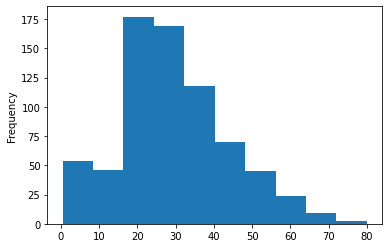

In [5]:
ti['age'].plot(kind='hist');


Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn. 

## How do I use seaborn to visualize data?

In [6]:
import seaborn as sns


### Checks for emptiness and cleanse data

In [7]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


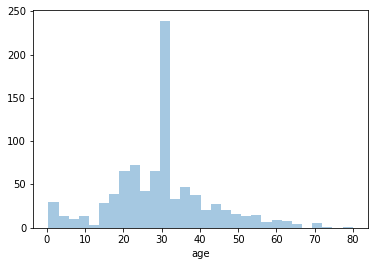

In [10]:
sns.distplot(ti['age'], kde=False);


##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


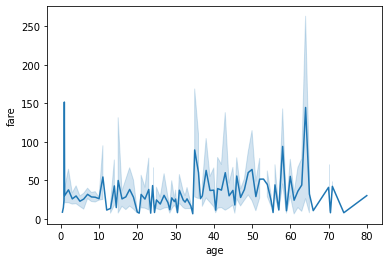

In [11]:
sns.lineplot(ti['age'], ti['fare'])


## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`... 

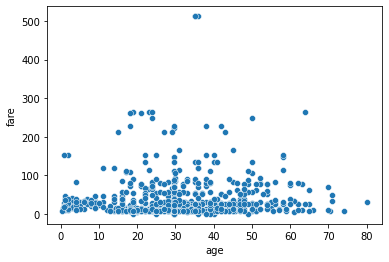

In [12]:
sns.scatterplot(data=ti, x='age', y='fare')


## How do I create a distribution plot?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


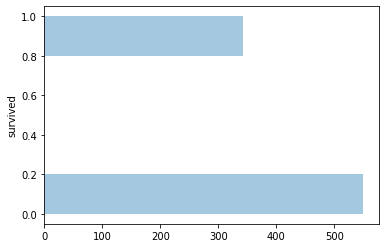

In [13]:
sns.distplot(ti['survived'], vertical=True, kde=False)


## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column... 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


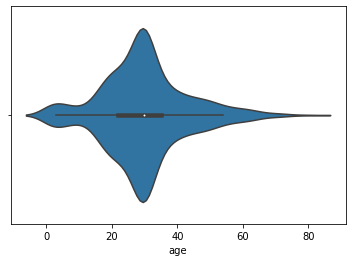

In [14]:
sns.violinplot(ti['age'])


## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


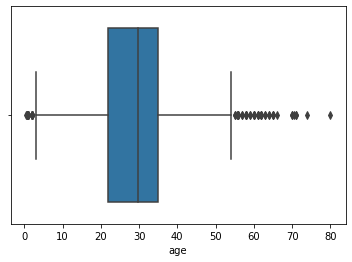

In [15]:
sns.boxplot(ti['age'])

## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

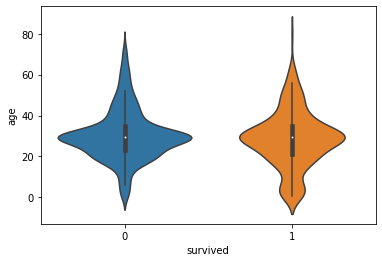

In [16]:
sns.violinplot(data=ti, x='survived', y='age')


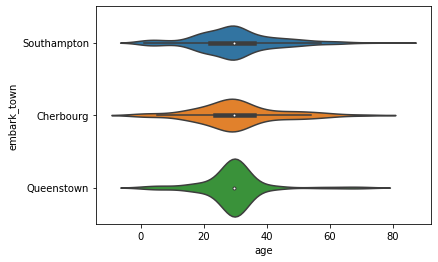

In [17]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

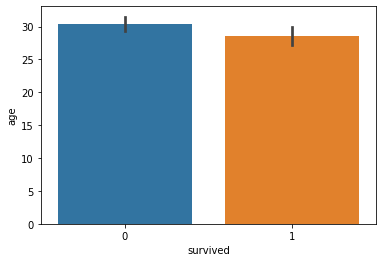

In [18]:
sns.barplot(data=ti, x='survived', y='age');

## How do I create a line plot?

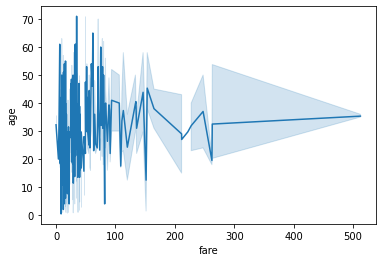

In [19]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

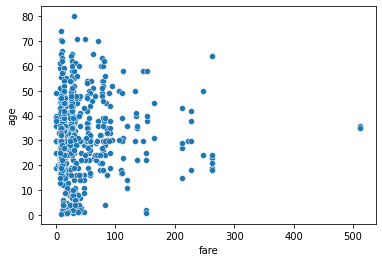

In [20]:
sns.scatterplot(data=ti, x='fare', y='age');


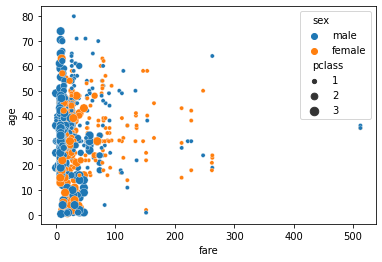

In [21]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individual, try a few plots

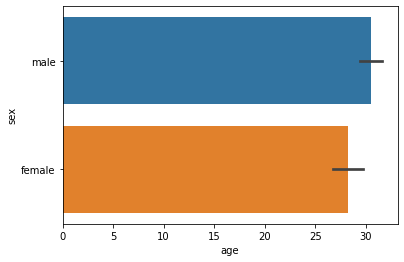

In [22]:
sns.barplot(x='age',y='sex',data=ti)

In [23]:
ti.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


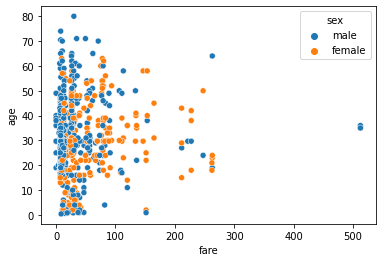

In [24]:

sns.scatterplot(x='fare',y='age',hue='sex',data=ti)

## Step 2 (25 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question. 

In [25]:
sur=ti.groupby('survived').count()

In [26]:
sur_gen=sur['sex']
sur_gen

survived
0    549
1    342
Name: sex, dtype: int64

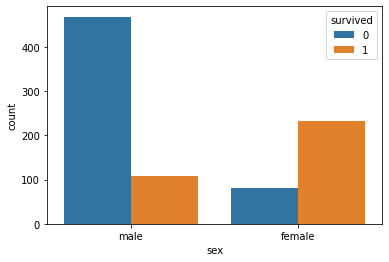

In [27]:
sns.countplot(x ="sex", hue ="survived", data = ti) #in the outcome more females survived

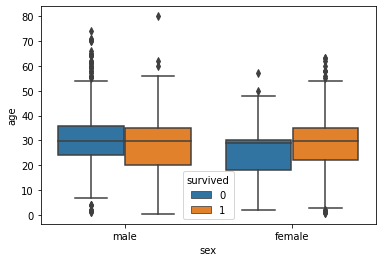

In [28]:
sns.boxplot(x ="sex",y='age', hue ="survived", data = ti) #the survival age of both man and female is 20 to 35

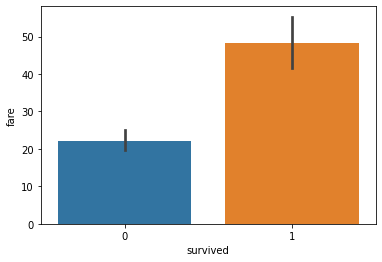

In [29]:

sns.barplot(y='fare',x='survived',data=ti) #people of more expensive ticket survived more

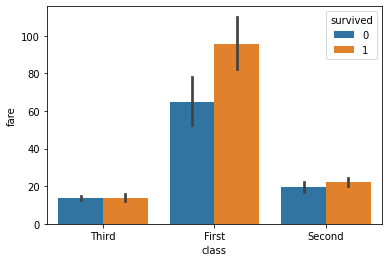

In [30]:
sns.barplot(x='class',y='fare',hue='survived',data=ti) 
#First class survived more and in second or first class the survival and non-survial rate is quite similar

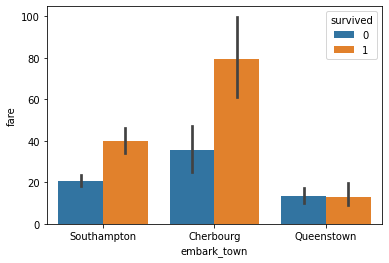

In [31]:
sns.barplot(y='fare',x='embark_town',hue='survived',data=ti)
#Those who boarded the ship from Cherbourg survived more comapred to those from southampton and queenstown

### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

ti[["age","sex"]].groupby(ti.age>18).sum()

In [32]:
s=ti['survived'].value_counts()
s

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


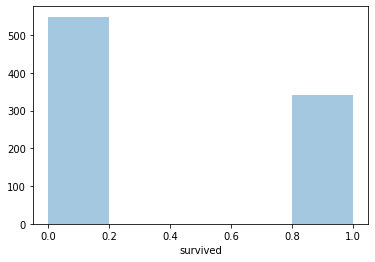

In [33]:

sns.distplot(ti['survived'], kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


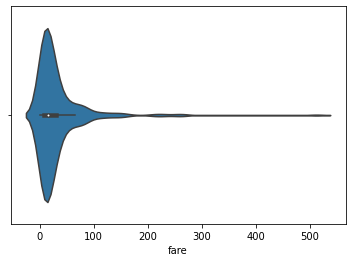

In [34]:
sns.violinplot(ti['fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


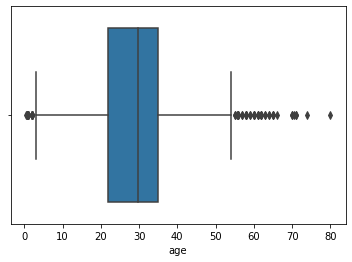

In [35]:

sns.boxplot(ti['age'])

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

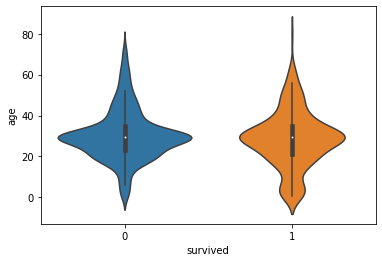

In [36]:

sns.violinplot(data=ti, x='survived', y='age')

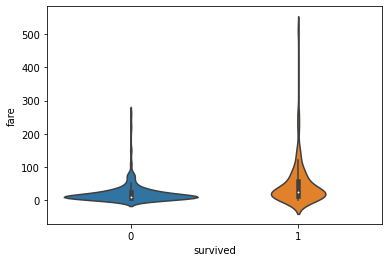

In [37]:
sns.violinplot(data=ti, x='survived', y='fare')

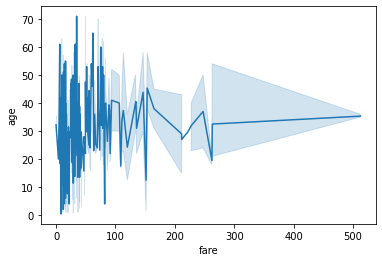

In [38]:
sns.lineplot(x='fare',y='age',data=ti)


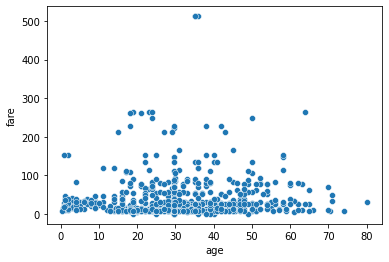

In [39]:
sns.scatterplot(x='age',y='fare',data=ti,palette='coolwarm')

In [40]:
ti[["age","sex"]].groupby(ti.age>18).sum()

,age
age,
False,1489.670000
True,24972.243824
